# Corner Finder

## Introduction/Business Problem

According to the Census around 35.5 million Americans move each year to new cities. The most stressful part of moving is finding a new neighborhood you can call home. The goal of this project is to find your corner every where you move or travel. Finding your corner is targeted to people that are relocating to a new place and want to find the environment they already love in another city. This is done by comparing two cities and creating a cluster among neighborhoods. 

## Data

Utilizing python and the foursquare API, neighborhoods of different cities are clustered by the type of venues and amenities that are offered in the different areas. The clustering analysis among neighborhoods results on grouping the most similar neighborhoods together creating  _"k"_  groups of similar neighborhoods,  _"k"_  is set before the clustering analysis.

The foursquare API allows different get request, the explore fet request is used wiht the parameters below:
- location in latitude, longitude 
- radius from the given coordinates 
- limit of venues to return



The relevant information of the venues from the response is:
- name of the venue
- location in latitude, longitude 
- venue category

In this particular case the neighborhoods in Miami will be compared to the ones in Sanfrancisco and clustered together similarities. 


### Miami

Miami is composed of number of neighboorhoods.

Miami's neighborhood coordinates are obtained from the wikipedia page through web scraping. Web scraping the 


In [2]:
#importing libraries that are needed 

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors



In [12]:
#scarping the wikipdia page 

res = requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami')
soup = BeautifulSoup(res.content,'lxml')
# table = soup.find_all('table')[0]
# print(table)
list_df = pd.read_html(str(soup))


#the output converted into a list
print(list_df)



[                     Neighborhood          Demonym            Population2010  \
0                      Allapattah              NaN                     54289   
1   Arts & Entertainment District              NaN                     11033   
2                        Brickell      Brickellite                     31759   
3                     Buena Vista              NaN                      9058   
4                   Coconut Grove          Grovite                     20076   
5                       Coral Way              NaN                     35062   
6                 Design District              NaN                      3573   
7                        Downtown       Downtowner  71,000 (13,635 CBD only)   
8                       Edgewater              NaN                     15005   
9                         Flagami              NaN                     50834   
10              Grapeland Heights              NaN                     14004   
11                Health District      

In [14]:
#converting the output into a dataframe
df = pd.DataFrame(list_df[0])
df.head()



,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates
0,Allapattah,NaN,54289,4401,NaN,25.815-80.224
1,Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190
2,Brickell,Brickellite,31759,14541,West Brickell,25.758-80.193
3,Buena Vista,NaN,9058,3540,Buena Vista East Historic District and Design ...,25.813-80.192
4,Coconut Grove,Grovite,20076,3091,"Center Grove, Northeast Coconut Grove, Southwe...",25.712-80.257


In [28]:
#creating a latitute and Longitude colum on table
df['Latitude'] = df['Coordinates'].str.split("-").str[0]
df['Longitude'] = '-'+df['Coordinates'].str.split("-").str[1]


In [202]:
#create a new dataframe only w/ longitude, latitude and neighborhood excluding longitude with null values
df1 = df[['Longitude','Latitude','Neighborhood']][df['Longitude'].notnull()]

,Longitude,Latitude,Neighborhood
0,-80.224,25.815,Allapattah
1,-80.190,25.799,Arts & Entertainment District
2,-80.193,25.758,Brickell
3,-80.192,25.813,Buena Vista
4,-80.257,25.712,Coconut Grove
5,-80.283,25.750,Coral Way
6,-80.193,25.813,Design District
7,-80.193,25.774,Downtown
8,-80.190,25.802,Edgewater
9,-80.316,25.762,Flagami


### Sanfrancisco

In [81]:
   
res1 = requests.get('http://www.healthysf.org/bdi/outcomes/zipmap.htm')
soup1 = BeautifulSoup(res1.content,'lxml')


table1 = soup1.find_all('table')[2]
#print(table1)
list_df1 = pd.read_html(str(table1))


#the output converted into a list
print(table1)


#US zipcode 



<table align="center" border="0" cellpadding="2" cellspacing="6" width="100%">
<tr valign="top">
<td align="left" bgcolor="#FFFFFF" height="317" width="63%">
<blockquote>
<p align="left"><font color="#CC0000" face="Verdana, Arial, Helvetica, sans-serif"><strong><font size="4">San 

          Francisco Neighborhoods as ZIP Codes</font></strong></font></p>
<p><img height="430" src="images/zip-map.jpg" width="514"/></p>
<table border="1" cellpadding="2" cellspacing="1" width="100%">
<tr bgcolor="#666666">
<td bgcolor="#666666" width="24%"><b><font color="#FFFFFF" face="Verdana, Arial, Helvetica, sans-serif" size="2">Zip 

              Code</font></b></td>
<td bgcolor="#666666" width="45%"><b><font color="#FFFFFF" face="Verdana, Arial, Helvetica, sans-serif" size="2">Neighborhood</font></b></td>
<td bgcolor="#666666" width="31%"><b><font color="#FFFFFF" face="Verdana, Arial, Helvetica, sans-serif" size="2">Population 

              (Census 2000)</font></b></td>
</tr>
<tr>
<td width="24%"

In [126]:
#slice the list to only get the information necesary
df_sf = pd.DataFrame(list_df1[2][1:21])
df_sf.columns = ['Zip Codes', 'Neighborhood']
df_sf.head(100)

,Zip Codes,Neighborhood
1,94102,Hayes Valley/Tenderloin/North of Market
2,94103,South of Market
3,94107,Potrero Hill
4,94108,Chinatown
5,94109,Polk/Russian Hill (Nob Hill)
6,94110,Inner Mission/Bernal Heights
7,94112,Ingelside-Excelsior/Crocker-Amazon
8,94114,Castro/Noe Valley
9,94115,Western Addition/Japantown
10,94116,Parkside/Forest Hill


In [128]:
#install library that allows zipcode convertion to coordinates 
!pip install uszipcode

    100% |████████████████████████████████| 378kB 4.2MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 3.6MB/s ta 0:00:01
    100% |████████████████████████████████| 122kB 5.4MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 6.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for autopep8 ... done
  Stored in directory: /Users/orianaaristizabal/Library/Caches/pip/wheels/2c/3d/d3/f7724286ed8337ea5d580d5eaa56ba1dae6ce89e6c8c03566a
Successfully built autopep8
  Found existing installation: pycodestyle 2.4.0
    Uninstalling pycodestyle-2.4.0:
      Successfully uninstalled pycodestyle-2.4.0
You are using pip version 18.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [150]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)
# zipcode_info = search.by_zipcode("94133")

zipcodes_sf_lat = []
zipcode_sf_lon = []

for zipcodes in df_sf['Zip Codes']:
    zipcode_info = search.by_zipcode(zipcodes)
    zipcodes_sf_lat.append(zipcode_info.lat)
    zipcode_sf_lon.append(zipcode_info.lng)
    

In [151]:
df_sf['Latitude'] = zipcodes_sf_lat
df_sf['Longitude'] = zipcode_sf_lon
df_sf.head()


,Zip Codes,Neighborhood,Latitude,Longitude
1,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420
2,94103,South of Market,37.780,-122.410
3,94107,Potrero Hill,37.770,-122.390
4,94108,Chinatown,37.791,-122.409
5,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420


### Putting Miami and SanFrancisco Neighboorhoods together

In [ ]:
#intall only the first time
#!pip install python-dotenv 

In [184]:
#connect to 4square API
import os
from os.path import join, dirname
from dotenv import load_dotenv
 

#import variables form .env file 
load_dotenv('.env')
 
# Accessing variables.
CLIENT_ID = os.getenv('CLIENT_ID') # your Foursquare ID
CLIENT_SECRET = os.getenv('CLIENT_SECRET') # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50


In [205]:
#add both sf and miami
sf_mia = pd.concat([df_sf[['Neighborhood','Longitude','Latitude']],df1])
sf_mia.head(100)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Latitude,Longitude,Neighborhood
1,37.78,-122.42,Hayes Valley/Tenderloin/North of Market
2,37.78,-122.41,South of Market
3,37.77,-122.39,Potrero Hill
4,37.791,-122.409,Chinatown
5,37.79,-122.42,Polk/Russian Hill (Nob Hill)
6,37.75,-122.42,Inner Mission/Bernal Heights
7,37.72,-122.44,Ingelside-Excelsior/Crocker-Amazon
8,37.76,-122.44,Castro/Noe Valley
9,37.79,-122.44,Western Addition/Japantown
10,37.74,-122.48,Parkside/Forest Hill


In [185]:
#function to get 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [208]:
sfmia_venues = getNearbyVenues(names=sf_mia['Neighborhood'],
                                   latitudes=sf_mia['Latitude'],
                                   longitudes=sf_mia['Longitude'])


Hayes Valley/Tenderloin/North of Market
South of Market
Potrero Hill
Chinatown
Polk/Russian Hill (Nob Hill)
Inner Mission/Bernal Heights
Ingelside-Excelsior/Crocker-Amazon
Castro/Noe Valley
Western Addition/Japantown
Parkside/Forest Hill
Haight-Ashbury
Inner Richmond
Outer Richmond
Sunset
Marina
Bayview-Hunters Point
St. Francis Wood/Miraloma/West Portal
Twin Peaks-Glen Park
Lake Merced
North Beach/Chinatown
Allapattah
Arts & Entertainment District
Brickell
Buena Vista
Coconut Grove
Coral Way
Design District
Downtown
Edgewater
Flagami
Grapeland Heights
Liberty City
Little Haiti
Little Havana
Lummus Park
Midtown
Overtown
Park West
The Roads
Upper Eastside
Venetian Islands
Virginia Key
West Flagler
Wynwood


In [215]:
sfmia_venues.head(100)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,Herbst Theater,37.779548,-122.420953,Concert Hall
1,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,War Memorial Opera House,37.778601,-122.420816,Opera House
2,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,San Francisco Ballet,37.778580,-122.420798,Dance Studio
3,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,Louise M. Davies Symphony Hall,37.777976,-122.420157,Concert Hall
4,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,War Memorial Court,37.779042,-122.420971,Park
...,...,...,...,...,...,...,...
95,South of Market,37.78,-122.41,Terroir,37.776524,-122.408413,Wine Bar
96,South of Market,37.78,-122.41,Mikkeller Bar SF,37.783956,-122.409056,Gastropub
97,South of Market,37.78,-122.41,Burma Club,37.782959,-122.407936,Burmese Restaurant
98,South of Market,37.78,-122.41,homeskillet,37.782152,-122.410319,American Restaurant


In [216]:
#analyze each neighborhoods

# one hot encoding
sfmia_onehot = pd.get_dummies(sfmia_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sfmia_onehot['Neighborhood'] = sfmia_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sfmia_onehot.columns[-1]] + list(sfmia_onehot.columns[:-1])
sfmia_onehot = sfmia_onehot[fixed_columns]

sfmia_onehot.head()

,Yoga Studio,ATM,Adult Boutique,Alternative Healer,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
sfmia_grouped = sfmia_onehot.groupby('Neighborhood').mean().reset_index()
sfmia_grouped

,Neighborhood,Yoga Studio,ATM,Adult Boutique,Alternative Healer,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,Allapattah,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Arts & Entertainment District,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000
2,Bayview-Hunters Point,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Brickell,0.000000,0.00,0.00,0.00,0.040000,0.000000,0.000000,0.000000,0.040000,...,0.00,0.00,0.000000,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Buena Vista,0.000000,0.00,0.00,0.00,0.029412,0.000000,0.029412,0.029412,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.029412,0.000000,0.000000,0.000000,0.029412
5,Castro/Noe Valley,0.040000,0.00,0.00,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,...,0.02,0.00,0.000000,0.00,0.000000,0.040000,0.020000,0.000000,0.000000,0.000000
6,Chinatown,0.000000,0.00,0.00,0.00,0.040000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Coconut Grove,0.000000,0.00,0.00,0.00,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Coral Way,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Design District,0.000000,0.00,0.00,0.00,0.030303,0.000000,0.030303,0.030303,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.030303,0.000000,0.000000,0.000000,0.030303


In [227]:
sfmia_grouped.sum()

Neighborhood          AllapattahArts & Entertainment DistrictBayview...
Yoga Studio                                                    0.299197
ATM                                                                0.02
Adult Boutique                                                     0.02
Alternative Healer                                                 0.04
                                            ...                        
Wine Bar                                                       0.384112
Wine Shop                                                      0.176192
Winery                                                        0.0208333
Wings Joint                                                    0.166667
Women's Store                                                 0.0597148
Length: 230, dtype: object

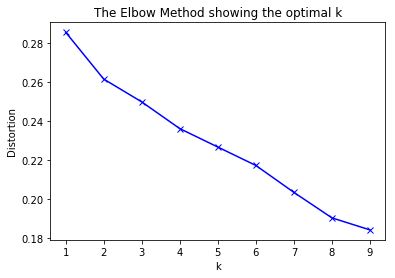

In [230]:
#clustering k? 

#

sfmia_grouped_clustering = sfmia_grouped.drop('Neighborhood', 1)
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
# x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

# plt.plot()
# plt.xlim([0, 10])
# plt.ylim([0, 10])
# plt.title('Dataset')
# # plt.scatter(x1, x2)
# plt.show()

# # create new plot and data
# plt.plot()
# X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
# colors = ['b', 'g', 'r']
# markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(sfmia_grouped_clustering)
    kmeanModel.fit(sfmia_grouped_clustering)
    distortions.append(sum(np.min(cdist(sfmia_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / sfmia_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 

In [ ]:
# CHeck the sillhouette Score as an alternative for elbow method.
# https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

In [ ]:
# set number of clusters
kclusters = 7

sf_grouped_clustering = sf_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_toronto.reset_index(drop=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

In [ ]:
# create map
map_clusters = folium.Map(location=[43.666667, -79.416667], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Below is an example of a function written in python handiling the request and reponse of the foursquare API: 
    

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


<a html= 'foursquare.com'>Foursquare</a> example of a JSON response from on a get 'explore' request:

In [ ]:

    
    {
  "meta": {
    "code": 200,
    "requestId": "5ac51ef86a607143de8eg5cb"
  },
  "response": {
    "warning": {
      "text": "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."
    },
    "suggestedRadius": 600,
    "headerLocation": "Lower East Side",
    "headerFullLocation": "Lower East Side, New York",
    "headerLocationGranularity": "neighborhood",
    "totalResults": 230,
    "suggestedBounds": {
      "ne": {
        "lat": 40.724216906965616,
        "lng": -73.9896507407283
      },
      "sw": {
        "lat": 40.72151724718017,
        "lng": -73.98693222860872
      }
    },
    "groups": [
      {
        "type": "Recommended Places",
        "name": "recommended",
        "items": [
          {
            "reasons": {
              "count": 0,
              "items": [
                {
                  "summary": "This spot is popular",
                  "type": "general",
                  "reasonName": "globalInteractionReason"
                }
              ]
            },
            "venue": {
              "id": "49b6e8d2f964a52016531fe3",
              "name": "Russ & Daughters",
              "location": {
                "address": "179 E Houston St",
                "crossStreet": "btwn Allen & Orchard St",
                "lat": 40.72286707707289,
                "lng": -73.98829148466851,
                "labeledLatLngs": [
                  {
                    "label": "display",
                    "lat": 40.72286707707289,
                    "lng": -73.98829148466851
                  }
                ],
                "distance": 130,
                "postalCode": "10002",
                "cc": "US",
                "city": "New York",
                "state": "NY",
                "country": "United States",
                "formattedAddress": [
                  "179 E Houston St (btwn Allen & Orchard St)",
                  "New York, NY 10002",
                  "United States"
                ]
              },
              "categories": [
                {
                  "id": "4bf58dd8d48988d1f5941735",
                  "name": "Gourmet Shop",
                  "pluralName": "Gourmet Shops",
                  "shortName": "Gourmet",
                  "icon": {
                    "prefix": "https://ss3.4sqi.net/img/categories_v2/shops/food_gourmet_",
                    "suffix": ".png"
                  },
                  "primary": true
                }
              ],
              "popularityByGeo": 0.9999983845502491,
              "venuePage": {
                "id": "77298563"
              }
            }
          }
        ]
      }
    ]
  }
}

Introduction where you discuss the business problem and who would be interested in this project.
-businees problem

-interest


Data where you describe the data that will be used to solve the problem and the source of the data.
-Miami data from wikipedia, data cleaning
-Sanfrancisco data from that website, data cleaning 
-4square data 
-income level/cost of living calculator 
-rent in the area
-safety crime 

Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

-How to show that Incomes in Sanfran are way higher than Miami
-Machine learning clustering and why 
-explanation of k and choosing k 


Results section where you discuss the results.
-Results  ok the clustering 

Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
-Any observation from results and methodology

Conclusion section where you conclude the report.
-Conclusion what neighboorhood I will live 